## Aula 04c - Transformada Discreta Inversa de Fourier 1D
Continuando a partir da DFT1D implementada anteriormente, vamos agora montar sua transformação inversa

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
def DFT1D(A):
    
    F = np.zeros(A.shape, dtype=np.complex64)
    n = A.shape[0]

    start = time.time()
    # criamos os indices para x
    x = np.arange(n)
    # para cada frequencia, computamos de forma vetorial para x e somamos em 'u'
    for u in np.arange(n):
        F[u] = np.sum(A*np.exp( (-1j * 2 * np.pi * u*x) / n ))
        
    end = time.time()
    elapsed = end - start
    
    print("Vector size: " + str(n))
    print("Running time: " + str(elapsed) + " sec.")
    
    return F

Vector size: 2000
Running time: 0.21073389053344727 sec.


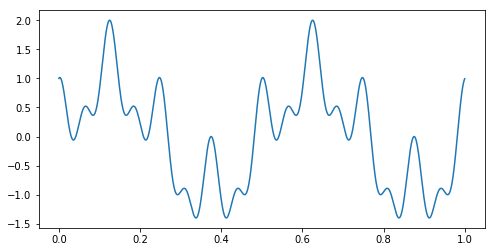

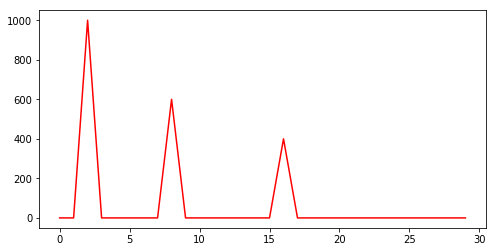

In [4]:
t = np.arange(0, 1, 0.0005)
f = 1*np.sin(t*(2*np.pi) * 2) + 0.6*np.cos(t*(2*np.pi) * 8) + 0.4*np.cos(t*(2*np.pi) * 16)

plt.figure(figsize=(8,4)) 
plt.plot(t,f)

F = DFT1D(f)
limit = 30
fq = np.arange(limit)
plt.figure(figsize=(8,4)) 
plt.plot(fq, abs(F[0:limit]), 'r')

A transformada inversa computa, para cada elemento do sinal, a soma da contribuição de todos os pontos dos senos e cossenos (exponencial complexa), porém com o sinal invertido! Na DFT tínhamos $-(j2\pi u x )/n$, agora teremos o mesmo termo, porém positivo.

Note ainda que pegamos apenas a parte real após a normalização por $n$, assim garantimos que o tipo estará correto


In [5]:
def IDFT1D(F):
    
    A = np.zeros(F.shape, dtype=np.float64)
    
    n = F.shape[0]

    u = np.arange(n)
    # para cada frequencia, computamos de forma vetorial para x e somamos em 'u'
    for x in np.arange(n):
        A[x] = np.sum(F * np.exp( ((2 * np.pi * 1j) / n ) * u*x ))
    
    # normalização por n e extração da parte real
    A = np.real(A/n)
    
    return A.astype(np.float64)


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


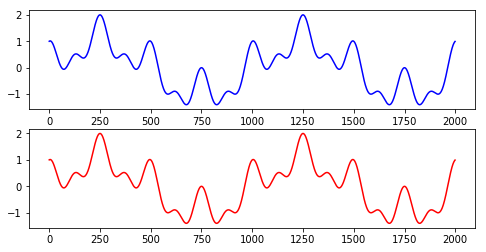

In [6]:
# invertendo a transformacao
fi = IDFT1D(F)

# e comparando visualmente o vetor original (f) e o obtido
# a partir da transformada inversa (fi), não é possível ver diferenças
plt.figure(figsize=(8,4)) 
plt.subplot(2,1,1)
plt.plot(f, 'b')
plt.subplot(2,1,2)
plt.plot(fi, 'r')

In [7]:
# para garantir, podemos computar o erro, usando a soma das diferenças absolutas:
np.sum(np.abs(fi-f))

5.556176810844054e-10

De fato, existe um erro devido à precisão utilizada para computar as exponenciais complexas e devido à conversão do resultado complexo para float novamente. Porém esse erro é desprezível (no exemplo anterior, na ordem de $10^{-10}$)

(-0.5, 511.5, 511.5, -0.5)

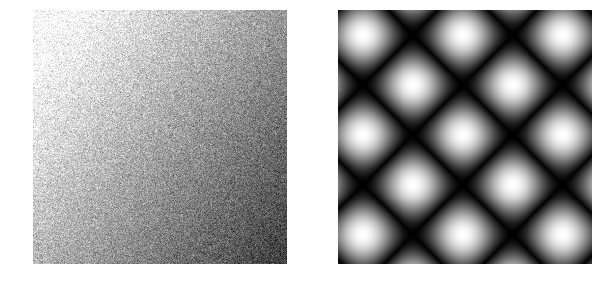

In [10]:
#carregando imagens
img1 = imageio.imread("imagens/gradient_noise.png")
img2 = imageio.imread("imagens/sin1.png")
plt.figure(figsize=(10,8)) 
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2, cmap="gray")
plt.axis('off')